📦 Supply Chain Management Demand Forecasting Project

This project analyzes and predicts the number of products sold using historical supply chain data.

Dataset used: supply_chain_data.csv
Model: HistGradientBoosting
Goal: Predict Number_of_products_sold and analyze trends using supply chain features.

In [3]:
# 📦 STEP 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score


In [4]:
# 📂 STEP 2: Load and Inspect Data
df = pd.read_csv("supply_chain_data.csv")
df.columns = df.columns.str.strip().str.replace(" ", "_")
df.head()


,Product_type,SKU,Price,Availability,Number_of_products_sold,Revenue_generated,Customer_demographics,Stock_levels,Lead_times,Order_quantities,...,Location,Lead_time,Production_volumes,Manufacturing_lead_time,Manufacturing_costs,Inspection_results,Defect_rates,Transportation_modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632


In [5]:
# ✅ STEP 3: Data Cleaning
df.drop(columns=["SKU"], inplace=True)
df.dropna(inplace=True)


In [6]:
# 🛠️ STEP 4: Feature Engineering
df["Profit_Margin"] = df["Revenue_generated"] - df["Manufacturing_costs"] - df["Shipping_costs"]
df["Cost_per_Unit"] = df["Manufacturing_costs"] / (df["Order_quantities"] + 1)  # Avoid divide by 0


In [7]:
# 🔣 STEP 5: Encode Categorical Features
cat_cols = df.select_dtypes(include="object").columns
encoder = OrdinalEncoder()
df[cat_cols] = encoder.fit_transform(df[cat_cols])


In [8]:
# 🎯 STEP 6: Define Target and Features
target = "Number_of_products_sold"
X = df.drop(columns=[target])
y = df[target]


In [9]:
# 🧪 STEP 7: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
# 📏 STEP 8: Standardization (Optional for CatBoost, done for completeness)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [30]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor, HistGradientBoostingRegressor

# Define the stacking model
stacking_model = StackingRegressor(
    estimators=[
        ('ridge', Ridge()),
        ('rf', RandomForestRegressor(n_estimators=100, random_state=42))
    ],
    final_estimator=HistGradientBoostingRegressor(random_state=42)
)

# Train the stacking model on scaled data
stacking_model.fit(X_train_scaled, y_train)



StackingRegressor(estimators=[('ridge', Ridge()),
                              ('rf', RandomForestRegressor(random_state=42))],
                  final_estimator=HistGradientBoostingRegressor(random_state=42))

In [31]:
# 📊 STEP 10: Model Evaluation
stack_preds = stacking_model.predict(X_test_scaled)
stack_mse = mean_squared_error(y_test, stack_preds)
stack_r2 = r2_score(y_test, stack_preds)

print(f"📉 Stacking MSE: {stack_mse:.2f}")
print(f"📈 Stacking R²: {stack_r2:.2f}")



📉 Stacking MSE: 121222.90
📈 Stacking R²: -0.27


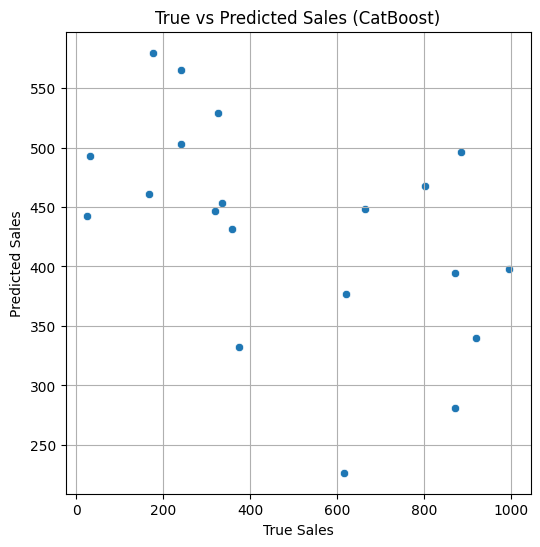

In [32]:
# 🧠 STEP 11: True vs Predicted Sales Plot
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("True Sales")
plt.ylabel("Predicted Sales")
plt.title("True vs Predicted Sales (CatBoost)")
plt.grid(True)
plt.show()


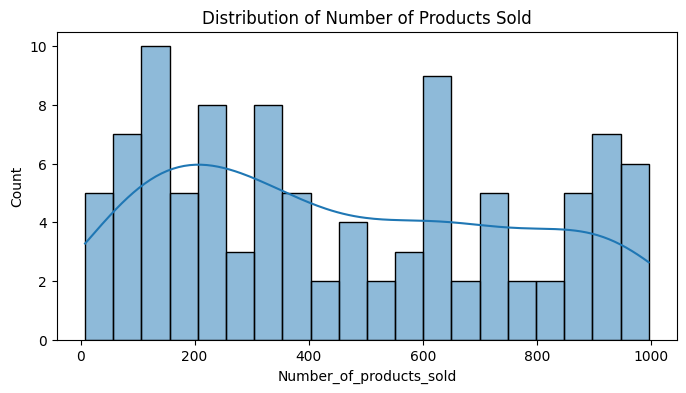

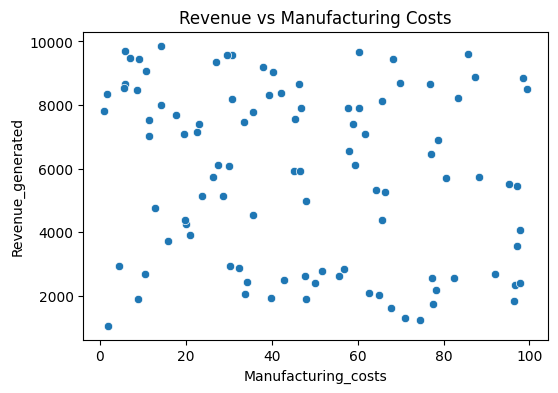

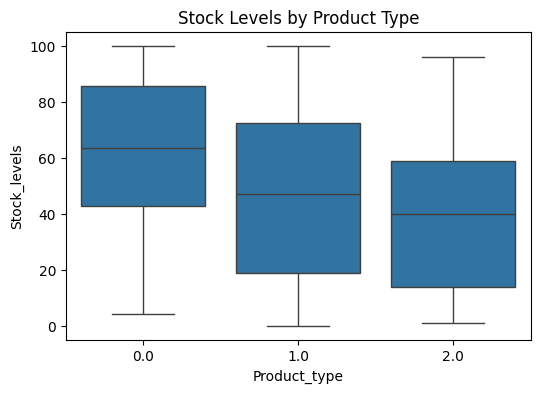

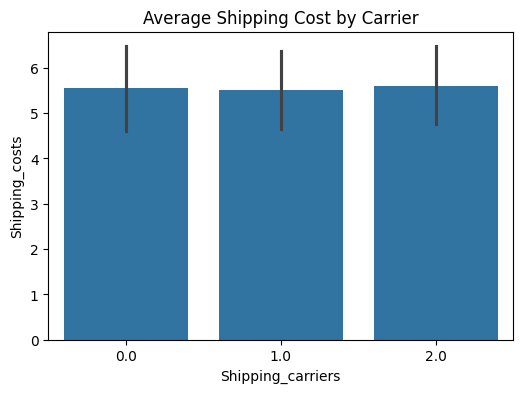

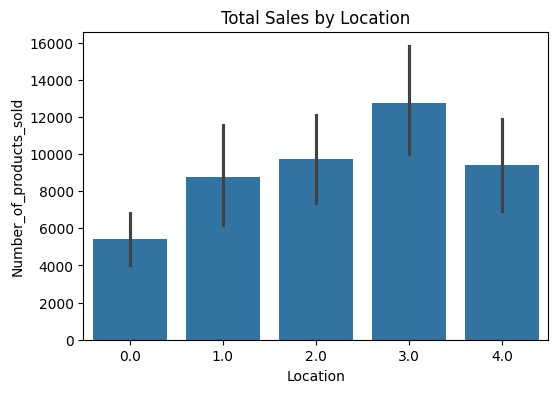

In [33]:
# 📈 STEP 12: Visualizations from PDF Objectives

# 1. Distribution of Sales
plt.figure(figsize=(8, 4))
sns.histplot(df["Number_of_products_sold"], bins=20, kde=True)
plt.title("Distribution of Number of Products Sold")
plt.show()

# 2. Revenue vs Manufacturing Costs
plt.figure(figsize=(6, 4))
sns.scatterplot(x="Manufacturing_costs", y="Revenue_generated", data=df)
plt.title("Revenue vs Manufacturing Costs")
plt.show()

# 3. Stock Levels by Product Type
plt.figure(figsize=(6, 4))
sns.boxplot(x="Product_type", y="Stock_levels", data=df)
plt.title("Stock Levels by Product Type")
plt.show()

# 4. Shipping Costs by Carrier
plt.figure(figsize=(6, 4))
sns.barplot(x="Shipping_carriers", y="Shipping_costs", data=df, estimator=np.mean)
plt.title("Average Shipping Cost by Carrier")
plt.show()

# 5. Sales by Location
plt.figure(figsize=(6, 4))
sns.barplot(x="Location", y="Number_of_products_sold", data=df, estimator=np.sum)
plt.title("Total Sales by Location")
plt.show()


In [34]:
# 📋 STEP 13: Summary KPIs

total_units_sold = int(df["Number_of_products_sold"].sum())
total_revenue = df["Revenue_generated"].sum()
avg_defect_rate = df["Defect_rates"].mean()

print(f"📦 Total Units Sold: {total_units_sold}")
print(f"💰 Total Revenue: ${total_revenue:,.2f}")
print(f"🔧 Average Defect Rate: {avg_defect_rate:.2f}%")


📦 Total Units Sold: 46099
💰 Total Revenue: $577,604.82
🔧 Average Defect Rate: 2.28%
